# Customer churn prediction

by: [Francisco Bustamante](https://franciscobustamante.com.br)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-flsbustamante-blue.svg)](https://www.linkedin.com/in/flsbustamante)
[![GitHub](https://img.shields.io/badge/GitHub-chicolucio-purple.svg)](https://github.com/chicolucio)

![banner](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/churn-prediction-article-banner.jpg?raw=true)

## Abstract

Churn is a measure of how many customers stop using a service or product, often evaluated for a specific period of time. One of the biggest difficulties in telecommunication industry is to retain the customers and prevent the churn.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. Acquiring new customers is not only more difficult, but also much more costly to companies than maintaining existing customer relationships. Therefore, many *Customer Churn Prediction* (CCP) models have been implemented.

In this study, a churn level prediction process is carried out using machine learning. A dataset with over 7000 customers of a telecom company is used. An action plan for the company is designed based on the results.

The complete dataset and auxiliary files can be found in the project repository on GitHub linked below:

[<center><img alt="GitHub" width="10%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/chicolucio/customer-churn-prediction)

## Contextualization

![churn](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/1.jpg?raw=true)

The telecom industry, while in a consolidation phase in developed markets, is booming in emerging markets [[1](http://link.springer.com/10.1007/978-3-642-41154-0_19)]. With the increasing variety of service providers, telecom churn has emerged as one of the most important causes of revenue erosion for telecom operators [[2](https://ieeexplore.ieee.org/document/8538420/)]. Then, predicting churners from the demographic and behavioral data of customers has been of great interest. Acquiring new subscribers can cost up to 6 times more than retaining an existing one [[3](https://ieeexplore.ieee.org/document/8706988)].

Churn management involves, among many others:

- predicting customers likely to churn
- preventive actions
- running marketing campaigns

But why do customers churn? [[4](https://www.productplan.com/glossary/churn/)]

There is no unique answer. However we can think of a few likely causes:

- customer no longer values the product
- motivating factors to use the product no longer exists
- customer frustrated with product user experience
- the product lacks a mandatory capability required by the user
- value to the customer does not justify the expense
- the customer has switched to an alternative solution
- damage to product reputation (e.g., cybersecurity issue, performance, etc.)

And how can a company reduce churn? [[4](https://www.productplan.com/glossary/churn/)]

Again, there is no silver bullet. But increasing the perceived value proposition of the service to current users is obviously a key point. This can be achieved in several ways, among them:

- make sure customers get the most out of the product
- recruit the right kind of customers
- price based on value
- continually add value without breaking what already works
- don't take customers for granted

In this study, an IBM dataset will be analyzed. The *Telco customer churn* data contains information about a telecom company named Telco that provide home phone and internet services to 7043 customers [[5](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)]. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics and services are included for each customer, totaling 20 features. The aim is to predict behavior to retain customers.

A cross-industry standard process for data mining (CRISP-DM) [[6](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining#cite_note-Shearer00-1)] approach will be used as shown in Figure 1.

<figure>
<img src="https://github.com/chicolucio/customer-churn-prediction/blob/master/images/diagram01.png?raw=true" alt="diagram crips" style="width:100%"/>
<figcaption align="center">Figure 1. Proposed methodology flow diagram</figcaption>
</figure>

Each step will be detailed in the appropriate section.


## Loading libraries

The following libraries were used. A Conda environment file is available at the project repository at GitHub [[7](https://github.com/chicolucio/customer-churn-prediction)] so that the exact development environment can be replicated by anyone.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import imblearn
import sklearn
from platform import python_version

packages = {'Pandas': pd,
            'Matplotlib': matplotlib,
            'Seaborn': sns,
            'NumPy': np,
            'Scikit-Learn': sklearn,
            'Imbalanced-Learn': imblearn}

print('Versions of the packages:\n')
print('{0:-^20} | {1:-^10}'.format('', ''))
print('{0:^20} | {1:^10}'.format('Package', 'Version'))
print('{0:-^20} | {1:-^10}'.format('', ''))

for name, alias in sorted(packages.items()):
    print(f'{name:<20} | {alias.__version__:>10}')

print()
print('{0}: {1}'.format('Python version', python_version()))

Versions of the packages:

-------------------- | ----------
      Package        |  Version  
-------------------- | ----------
Imbalanced-Learn     |      0.9.1
Matplotlib           |      3.5.1
NumPy                |     1.22.3
Pandas               |      1.4.2
Scikit-Learn         |      1.1.1
Seaborn              |     0.11.2

Python version: 3.9.12


The following cell imports all the classes and functions needed. Some custom functions were developed, as well as a custom Matplotlib style. Their code is in the `scripts` folder at the project repository [[7](https://github.com/chicolucio/customer-churn-prediction)].

In [2]:
# some warning may arise during GridSearchCV, and they can be ignored
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# plots
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, PercentFormatter, MultipleLocator

plt.style.use('scripts/flsbustamante.mplstyle')

# scaling and composing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

# imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost

xgboost.set_config(verbosity=0)

# custom functions and variables
from scripts.functions import (model_summary,
                               confusion_matrix_norm, confusion_matrix_plot,
                               score_table,
                               hyperparameter_tuning,
                               RANDOM_STATE, scoring)

# presentation and local constants
from IPython.core.display_functions import display

JOBS = -2

## Summarizing data and understanding the problem in hand

![eda](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/2.jpg?raw=true)

### Data dictionary

Each row represents a customer, and each column contains the customer's attributes, as described below. The dataset includes information about:

- Customers who left within the last month:
    - `Churn`: *Yes* = the customer left the company within the last month. *No* = the customer remained with the company.
- Customers' demographic info:
    - `gender`: customer's gender: *Male*, *Female*
    - `SeniorCitizen`: customer is 65 or older: *1*, *0* (meaning *Yes* and *No*, respectively)
    - `Partner`: customer is married: *Yes*, *No*
    - `Dependents`: customer lives with any dependents: *Yes*, *No*. Dependents could be children, parents, grandparents, etc.
- Services that each customer has signed up for:
    - `PhoneService`: customer subscribes to home phone service with the company: *Yes*, *No*
    - `MultipleLines`: customer subscribes to multiple telephone lines with the company: *Yes*, *No*, *No internet service*
    - `InternetService`: customer subscribes to Internet service with the company: *No*, *DSL*, *Fiber Optic*
    - `OnlineSecurity`: customer subscribes to an additional online security service provided by the company: *Yes*, *No*, *No internet service*
    - `OnlineBackup`: customer subscribes to an additional online backup service provided by the company: *Yes*, *No*, *No internet service*
    - `DeviceProtection`: customer subscribes to an additional device protection plan for their Internet equipment provided by the company: *Yes*, *No*, *No internet service*
    - `TechSupport`: customer subscribes to an additional technical support plan from the company with reduced wait times: *Yes*, *No*, *No internet service*
    - `StreamingTV`: customer uses their Internet service to stream television programming from a third-party provider: *Yes*, *No*, *No internet service*
    - `StreamingMovies`: customer uses their Internet service to stream movies from a third-party provider: *Yes*, *No*, *No internet service*
- Customer account information:
    - `tenure`: total number of months that the customer has been with the company.
    - `Contract`: customer's current contract type: *Month-to-Month*, *One Year*, *Two Year*.
    - `PaperlessBilling`: customer has chosen paperless billing: *Yes*, *No*
    - `PaymentMethod`: how the customer pays their bill: *Electronic check*, *Credit Card*, *Mailed Check*, *Bank transfer*
    - `MonthlyCharge`: customer's current total monthly charge for all their services from the company
    - `TotalCharges`: customer's total charges, calculated to the end of the quarter
- Finally, each customer has a `CustomerID`, a unique ID that identifies the customer.

### What problem we have and which metric to use?

Based on data dictionary, it is a classification problem.
- `Churn` is the target variable
- It is a binary (*yes* or *no*) classification problem

We will start our study with data wrangling to:
- structure and organize the data
- clean the data
    - wrong data types
    - remove duplicates
- enrich the data
    - decide how to deal with empty entries (if any)

Then, we will perform an exploratory data analysis (EDA) to:
- identify categorical and non-categorical features
- visualize the distribution of each feature
- identify correlations
- identify outliers
- check the need for data transformations
- check the balance of the target variable
    - as we will see, the target is imbalanced

After the EDA, we are going to evaluate some machine learning algorithms to see which one give the best churn prediction. Scikit-Learn pipelines will be used with preprocessing steps (standardization and encoding). Some algorithms may have problems with imbalanced targets [[8](https://linkinghub.elsevier.com/retrieve/pii/S0957417408002121)]. So, some strategies will be evaluated to deal with the imbalance and added to the preprocessing steps. After the preprocessing steps, each model will be added to the pipeline and evaluated through cross validation.

Imbalanced data also have consequences in the choice of the evaluation metrics. Although the dataset is not heavily imbalanced, some known problems arise when dealing with such cases, mainly the accuracy paradox [[9](https://en.wikipedia.org/wiki/Accuracy_paradox)] and the unreliability of the ROC curves. Based on the literature, the chosen metric is the area under the precision-recall curve [[10](https://dx.plos.org/10.1371/journal.pone.0118432)]. A more detailed explanation will be given at the appropriate section.

With the chosen metric, a grid search will be performed to tune the hyperparameters of selected algorithms to maximize the score of such metric. Finally, a critical analysis of the results will be made with some proposed actions to address the features that have more correlation with churn.

We can now enhance our methodology flow chart with all these steps, as shown in Figure 2:

<figure>
<img src="https://github.com/chicolucio/customer-churn-prediction/blob/master/images/diagram02.png?raw=true" alt="flow chart" style="width:100%"/>
<figcaption align="center">Figure 2. Methodology flow diagram</figcaption>
</figure>



### Basic info

Let's get some basic info about our dataset to get familiarized with it:

In [3]:
DATAFILE = 'data/ibm_telco_customer_churn.csv'

df = pd.read_csv(DATAFILE)
with pd.option_context('display.max_columns', 25):
    display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There is an inconsistent representation of the categorical column `SeniorCitizen`. All other categorical columns have strings as entries, like *Yes* or *No*. In the `SeniorCitizen` column, *0* means *No* and *1* means *Yes*. We will deal with it later.

Let's check the size of the dataset and the types of each column:

In [4]:
print(f'Number of instances (rows): {df.shape[0]:>10}')
print(f'Number of attributes (columns): {df.shape[1]:>5}')

Number of instances (rows):       7043
Number of attributes (columns):    21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It appears that there are no missing values. However, the `TotalCharges` column should be float type. Probably it is being recognized as object due to some empty entries recorded as strings with spaces. Let's check:

In [6]:
sum(map(lambda x: x.isspace(), df['TotalCharges']))

11

There are 11 entries in `TotalCharges` with empty spaces. Before dealing with it, it is wise to check if this issue happens in other columns:

In [7]:
object_columns = [column for column in df.columns if (df[column].dtype == 'object')]
for column in object_columns:
    print(f'{column:<20} {sum(map(lambda x: x.isspace(), df[column]))}')

customerID           0
gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
TotalCharges         11
Churn                0


Only the `TotalCharges` column has spaces.

### Data wrangling

As seen before, we have an inconsistent representation problem and spaces in a column that should be numerical. We are going to replace the 0/1 representation in the `SeniorCitizen` column by *No/Yes* so that this column in correctly addressed as a categorical one during the EDA. Later in this study, all categorical columns will be encoded, as many algorithms need numerical inputs. All the spaces will be replaced by `NaN` and the `to_numeric` method of Pandas will be applied in all the dataset columns to force numeric types where they are needed:

In [8]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.apply(pd.to_numeric, errors='ignore')
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

Let's confirm that all previous entries with spaces are now recognized as null entries:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

All the null entries are in the `TotalCharges` column, a numeric column. With the `describe` method, we can generate descriptive statistics to all numeric columns:

In [11]:
with pd.option_context('display.precision', 2, 'display.max_columns', 25):
    display(df.describe())

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.47
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


As expected, `TotalCharges` has a broad range of values. Let's see the proportion of empty entries in this column and see the correspondent entries in other columns:

In [12]:
df['TotalCharges'].isnull().sum() / df.shape[0] * 100  # percentage of empty rows

0.1561834445548772

In [13]:
df.loc[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We could remove `TotalCharges` empty rows since is a small percentage of the dataset. However, these rows are legit as they correspond to new customers (`tenure == 0`). Even though there are values in `MonthlyCharges` column, there is no total values. As described in the data dictionary, the total charges are summed up quarterly, so new customers will not have entries. We could fill the gaps with zero or some reasonable value. Since the wide range, we will fill with the median value:

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Let's check if there are entries with *0* in other columns besides `tenure`:

In [15]:
df[df == 0].count()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

Now, we can check the unique values for each column. This is a great way to understand categorical features:

In [16]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

The demographics columns have two categories each, while most of the services related columns have three. We can use the `describe` method, configure to deal with non-numerical data, to extract more information of these columns:

In [17]:
df.describe(exclude=[np.number])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Now we know that most customers:
- are male
- are younger than 65 years
- have no partner and no dependents
- have phone service, with a single line
- have fiber optic internet service
- do not have online services (security, backup, device protection)
- do not have tech support
- do not have streaming services
- have monthly contracts
- have paperless billing and pay with electronic check

The target feature `Churn` has `No` as the most frequent value, occurring 5174 times.

It's time to get visual.

### Data visualization

We are interested in the churn rate, so let's start with the target column. Let's find out the proportion of churn:

In [18]:
churn = df.groupby('Churn').size()
churn

Churn
No     5174
Yes    1869
dtype: int64

In [19]:
churn.div(churn.sum(axis=0)).multiply(100)

Churn
No     73.463013
Yes    26.536987
dtype: float64

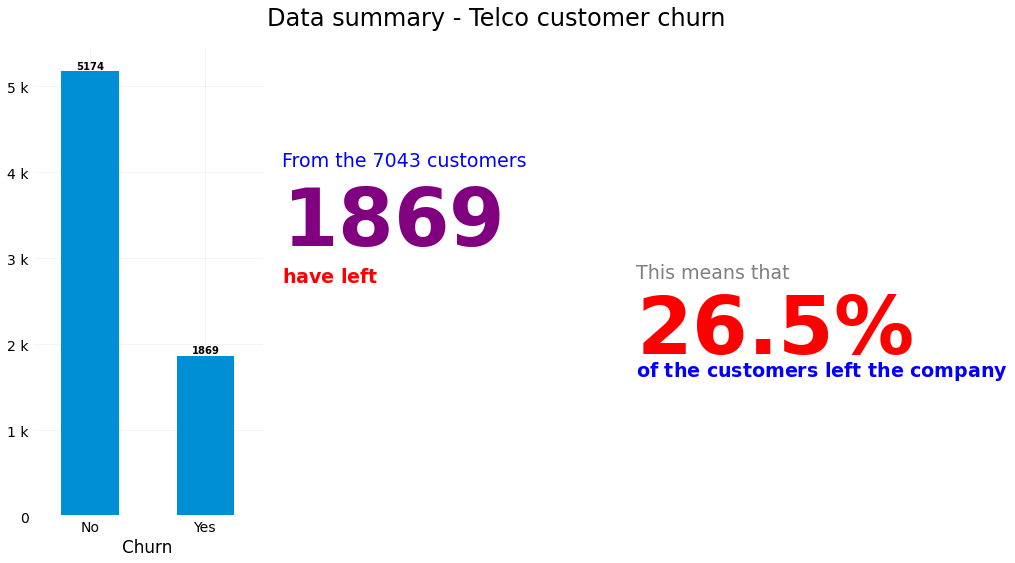

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1)

for ax in (ax2, ax3):
    ax.axis('off')

eng_format = EngFormatter(places=1)
labels = churn.values

churn.plot(kind='bar', ax=ax1)

ax1.yaxis.set_major_formatter(EngFormatter())
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelrotation=0)

ax1.bar_label(ax1.containers[0], label_type='edge',
              labels=labels,
              color='black', fontsize=10,
              weight='bold')

ax2.text(-0.15, 0.75, 'From the 7043 customers', fontsize=19, color='blue')

ax2.text(-0.15, 0.58, r'$\bf{1869}$', fontsize=80, color='purple')

ax2.text(-0.15, 0.5, r'$\mathrm{\bf{have\ left}}$', fontsize=19, color='red')

ax3.text(0.15, 0.51, 'This means that', fontsize=19, color='gray')

ax3.text(0.15, 0.35, r'$\mathrm{\bf{26.5\%}}$', fontsize=80, color='red')

ax3.text(0.15, 0.3, r'$\mathrm{\bf{of\ the\ customers\ left\ the\ company}}$',
         fontsize=19, color='blue')

fig.suptitle('Data summary - Telco customer churn')

plt.show()

A little more than one quarter of the customers left the company in the last month. A high number that we need to understand.

First, we will look at the numerical features. Starting with histograms to search for patterns in the distributions:

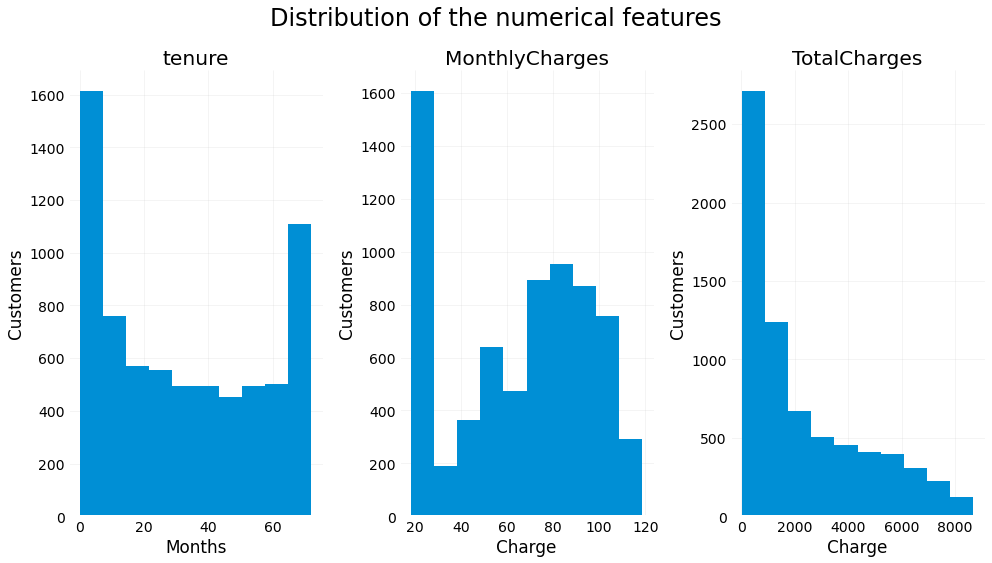

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df.hist(ax=axes)

axes[0].set_xlabel('Months')
axes[0].set_ylabel('Customers')
axes[1].set_xlabel('Charge')
axes[1].set_ylabel('Customers')
axes[2].set_xlabel('Charge')
axes[2].set_ylabel('Customers')

fig.suptitle('Distribution of the numerical features')
plt.show()

The tenure distribution has an interesting shape. Most customers have been with the company for just a few months, but also many have been for about 72 months (maximum value for tenure). This is probably related with different contracts, something that we will check soon. Probably some marketing campaign was ran recently to capture new customers due to the high number of customers with few months.

We can see that most customers pay low monthly charges, but there is a great fraction with medium values. Since most customers have been with the company for just a few months, the total charges plot shows most customers with low values.

Let's check if the tenure distribution has some kind of relation with the kind of contract:

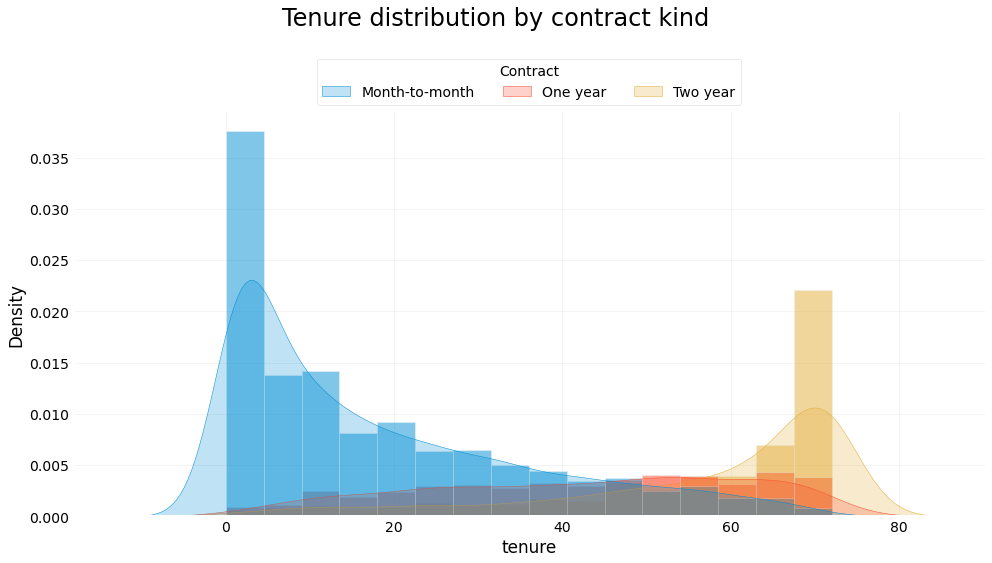

In [22]:
fig, ax = plt.subplots()

sns.histplot(x='tenure', hue='Contract', data=df, ax=ax,
             kde=False, fill=True, stat='density', common_norm=True,
             multiple='layer')
sns.kdeplot(x='tenure', hue='Contract', data=df,
            ax=ax, fill=True, multiple='layer')

fig.suptitle('Tenure distribution by contract kind')

sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()


As can be seen, most of the monthly contracts last for a few months, while the 2 years contracts tend to last for years, with a great increase towards the greater values of tenure in this dataset. This implies that customers with a great commitment at the beginning, like a 2-year contract, tend to stay with the company for a longer period of time. Long-term contracts usually have contractual fines. Therefore, customers have to wait until the end of the contract to churn. It is not clear if it is the case. A time-series data would be better to study this.

As seem before, we have numerical and categorical columns. Below, we are going to create variables to these different columns and drop the `customerID` column:

In [23]:
df = df.drop('customerID', axis=1)
not_categorical = ('customerID', 'tenure', 'MonthlyCharges', 'TotalCharges')
categorical = [feature for feature in np.setdiff1d(df.columns.values,
                                                   not_categorical)]

Let's start to see how our target variable relates with our numerical features.

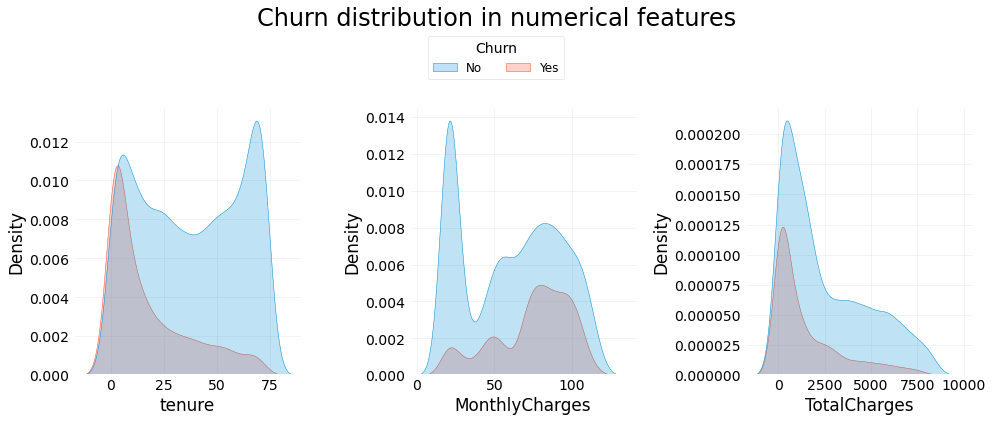

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6))

for i, feature in enumerate(not_categorical[1:]):
    k = sns.kdeplot(x=feature, hue='Churn', data=df, ax=axes.flat[i],
                    fill=True, multiple='layer')
    handles = k.legend_.legendHandles
    labels = [t.get_text() for t in k.legend_.get_texts()]
    k.legend_.remove()

fig.suptitle('Churn distribution in numerical features\n\n')
fig.legend(bbox_to_anchor=(0.5, 0.925), loc='upper center', ncol=2,
           labels=labels, handles=handles, fontsize=12, title='Churn')
plt.show()

The above plot shows that short tenure (recent) customers have higher churn rates. Moreover, the higher the monthly charge, the higher the churn rate.

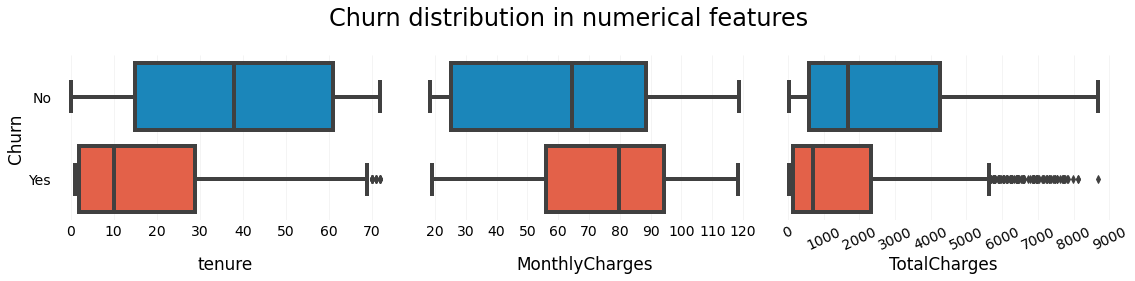

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4), sharey=True)

for i, feature in enumerate(not_categorical[1:]):
    sns.boxplot(x=feature, y='Churn', data=df, ax=axes.flat[i])

axes.flat[0].xaxis.set_major_locator(MultipleLocator(10))
axes.flat[1].xaxis.set_major_locator(MultipleLocator(10))
axes.flat[1].set_ylabel('')
axes.flat[2].xaxis.set_major_locator(MultipleLocator(1000))
axes.flat[2].set_ylabel('')
axes.flat[2].tick_params(axis='x', rotation=25)

fig.suptitle('Churn distribution in numerical features')
fig.align_labels()
plt.show()

The boxplots show that the churn rate is higher among customers with low tenure and high monthly charges. In details:
- the median tenure for customers who have left is around 10 months, while it is around 40 months for those who have stayed with the company
- the median monthly charge for customers who have churned is around 80, while it is around 65 for those who have not churned
- since most customers who have churned spent less time with the company, they have low total charges compared with those who have stayed
    - There are many outliers in the total charges boxplot of customers who have churned. It is not clear the cause, but it could be wrong billing or expensive services that guided the customers away from the company.

Now the categorical features. Let's find out the proportion of each category:

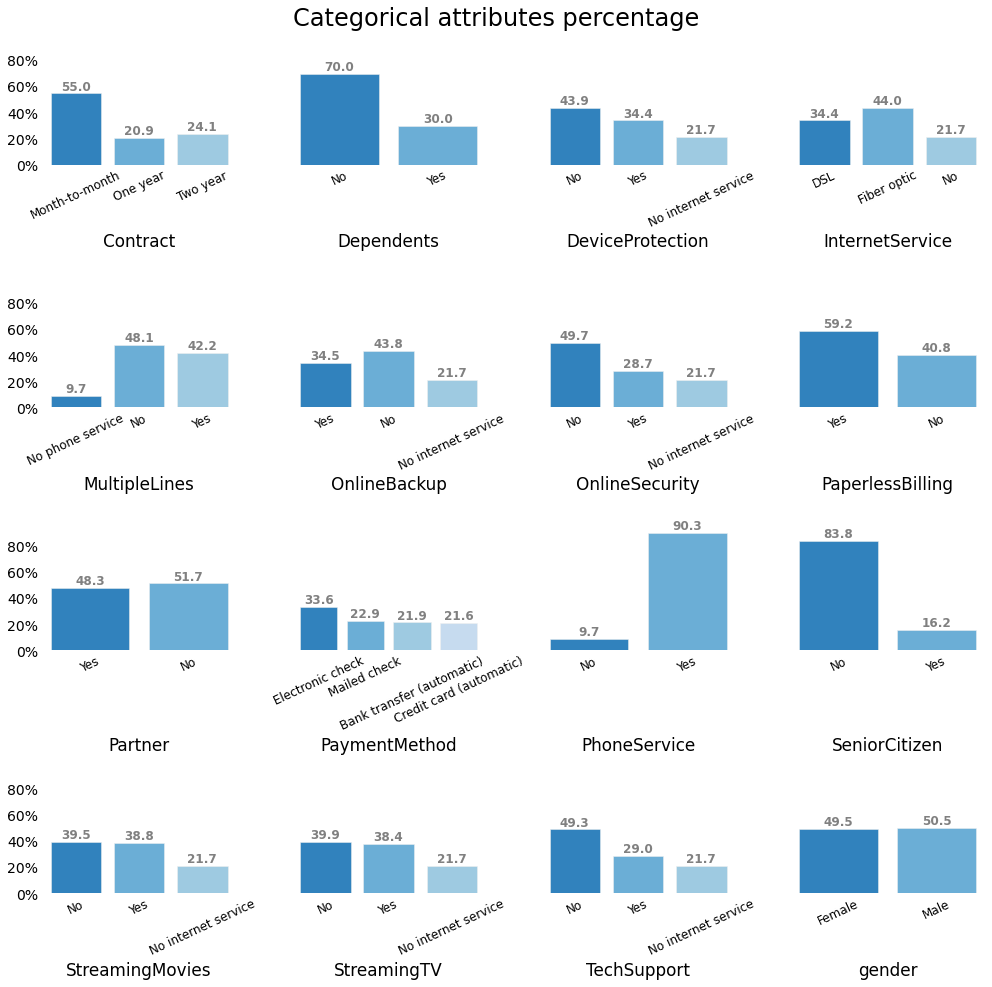

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 14), sharey=True)

for i, feature in enumerate(categorical[1:]):
    c = sns.histplot(x=feature, data=df, ax=axes.flat[i],
                     stat='percent', multiple='dodge', shrink=0.8,)
    c.tick_params(axis='x', labelsize=12, rotation=25)
    c.grid(False)
    c.yaxis.set_major_formatter(PercentFormatter())
    c.yaxis.set_major_locator(MultipleLocator(20))
    c.set_ylabel('')

    for bar in c.containers:
        c.bar_label(bar, label_type='edge', color='gray',
                    labels=[f'{b.get_height():.1f}' if b.get_height() > 0 else '' for b in bar],
                    fontsize=12, weight='bold')
        for b, c in zip(bar, sns.color_palette('tab20c')):
            b.set_facecolor(c)

fig.align_labels()
fig.suptitle('Categorical attributes percentage')
plt.show()


Some highlights:

- the dataset is almost equally distributed in terms of gender
- 55.0 % of the customers have month-to-month contracts
- 21.7 % of the customers do not have internet service
- 90.3 % of the customers have phone service
- there are only 16.2 % senior customers. Thus, most customers are young people (less than 65 years)
- 48.3% have a partner, but only 30 % have dependents

We see that some categorical features have 'No' and 'No internet service' (or 'No phone service') as categories. Maybe all of them can be labeled as 'No' if the categories provide no additional information. We can check this, plotting the churn rate by category:

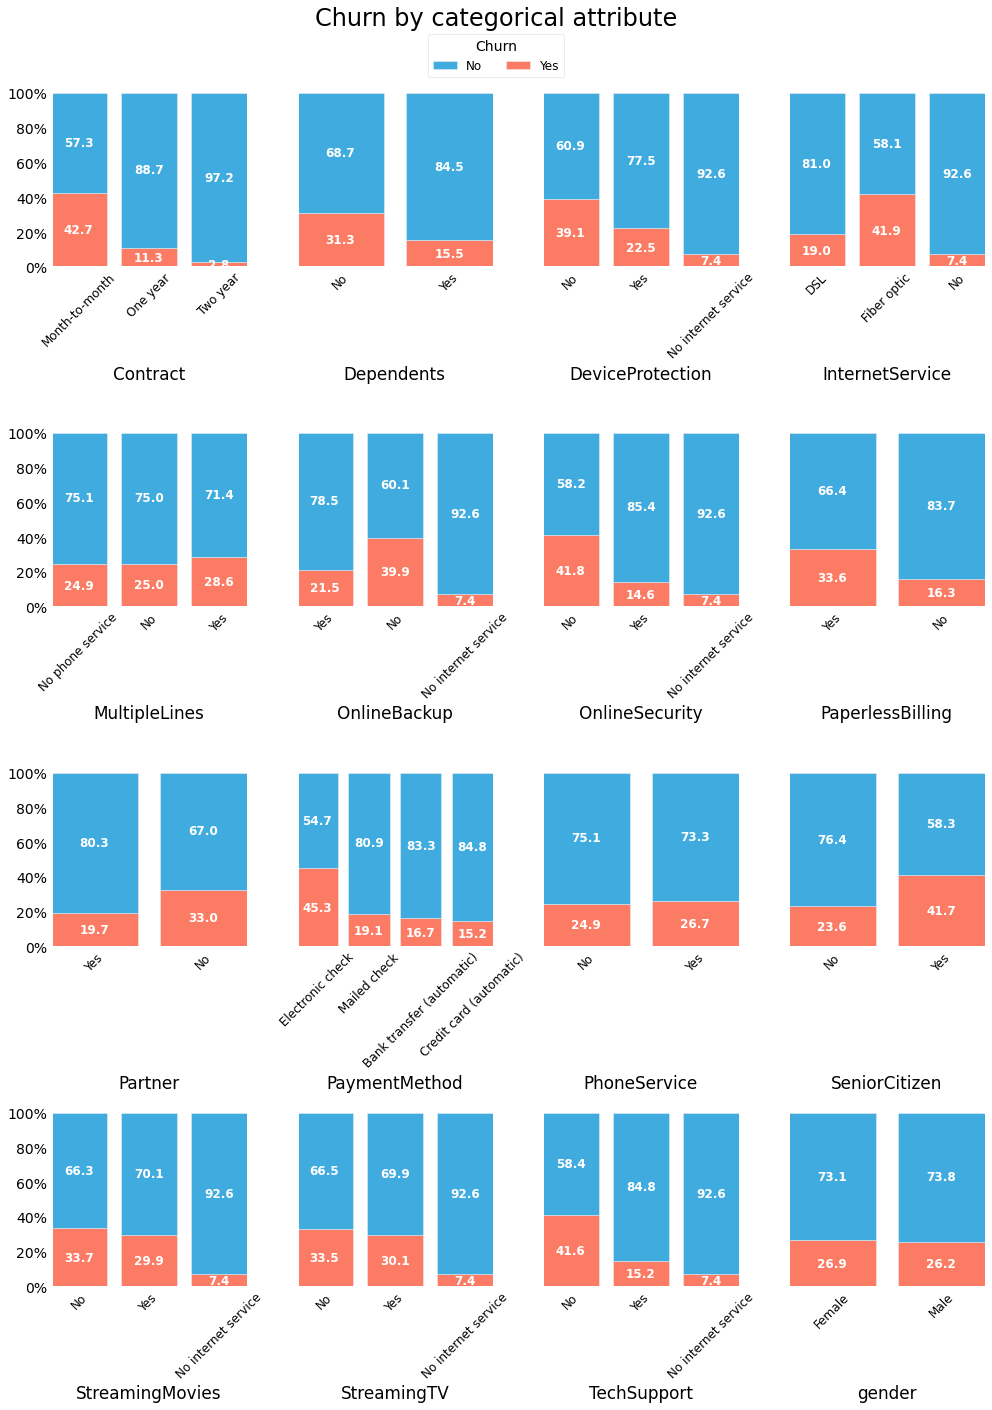

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 20), sharey=True)

for i, feature in enumerate(categorical[1:]):
    c = sns.histplot(x=feature, hue='Churn', data=df, ax=axes.flat[i],
                     stat='percent', multiple='fill', shrink=0.8,
                     common_norm=True)
    c.tick_params(axis='x', labelsize=12, rotation=45)
    c.grid(False)
    handles = c.legend_.legendHandles
    labels = [t.get_text() for t in c.legend_.get_texts()]
    c.legend_.remove()
    c.yaxis.set_major_formatter(PercentFormatter(1))
    c.set_ylabel('')
    for bar in c.containers:
        c.bar_label(bar, label_type='center', color='white',
                    labels=[f'{b.get_height() * 100:.1f}' if b.get_height() > 0 else '' for b in bar],
                    fontsize=12, weight='bold')

fig.suptitle('Churn by categorical attribute\n\n')
fig.legend(bbox_to_anchor=(0.5, 0.965), loc='upper center', ncol=2,
           labels=labels, handles=handles, fontsize=12, title='Churn')
fig.align_labels()
plt.show()

Features that seem to be positively correlated with churn:
- month to month contracts
- absence of online backup, online security, and device protection services
- absence of tech support
- being a senior citizen
- paperless billing
- pay with electronic check
- internet service by fiber optic

Features that seem to be negatively correlated with churn:
- two-year contracts
- absence of internet service
- having a partner or dependent

We will quantify these correlations soon. First, let's try to interpret the findings.

Both genders behave similarly when it comes to migrating to another service provider.

It is interesting to see that each service that has the "No internet service" category has much lower churn rates. Maybe the internet service provided by the company has connectivity problems, particularly the fiber optic one. It could also be that the setup is not easy, so that those who opted not to have tech support may not be able to use the services. And that would be more severe in senior customers. While it seems that there are issues with the fiber optic internet, the DSL one has a much lower churn rate despite being a slower connection.

Since the "No internet service" category provided insights, it will not be merged with the "No" category.

We can explore more details about the internet service:

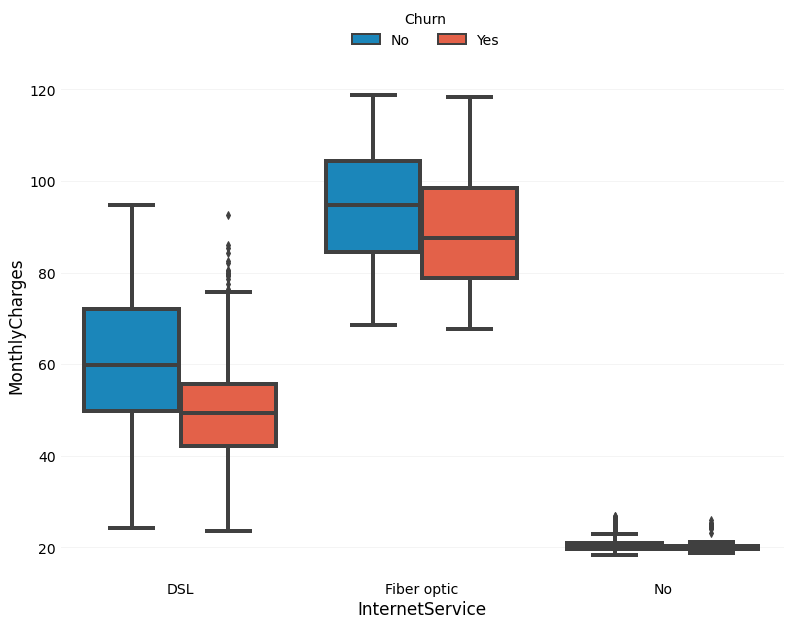

In [28]:
c = sns.catplot(x='InternetService', y='MonthlyCharges', data=df,
                hue='Churn', kind='box', height=8, aspect=1.4)

sns.move_legend(c, 'upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.show()


It's interesting that customers with DSL and higher monthly charges have lower churn rate.

The data suggest that the more people at the customers' places, the less churn. Customers with partners or dependents have lower churn rates. Probably because more people are involved in the decision of leaving, making it more difficult.

For marketing reasons, we can see how many customers who have partners also have dependents. Assuming that, in most cases, "dependents" mean children, it is more likely that customers with partners will also have dependents. Let's check this assumption.

First, let's group our data frame:

In [29]:
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack()
partner_dependents

Dependents,No,Yes
Partner,,
No,3280,361
Yes,1653,1749


The proportion is more informative than absolute numbers, so we are going to convert to fractions:

In [30]:
partner_dependents_pct = partner_dependents.div(partner_dependents.sum(1),
                                                axis=0)
partner_dependents_pct

Dependents,No,Yes
Partner,,
No,0.900851,0.099149
Yes,0.485891,0.514109


Now, we can plot the data:

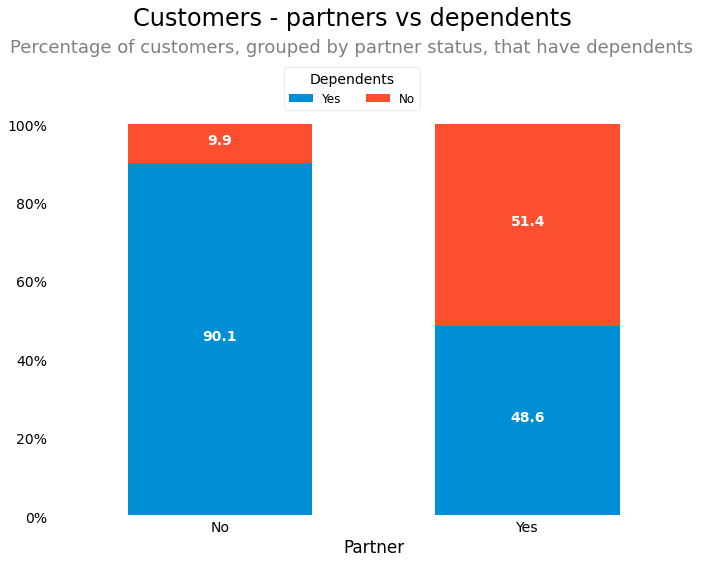

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

c = partner_dependents_pct.plot(kind='bar', stacked=True, rot=0, ax=ax,
                                width=0.6)
c.yaxis.set_major_formatter(PercentFormatter(1))
c.grid(False)
c.legend_.remove()

for p in c.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    c.annotate(f'{height*100:.1f}', (x + width/2, y + height*0.5), ha='center',
               color='white', weight='bold', size=14)

fig.suptitle('Customers - partners vs dependents\n\n')
plt.gcf().text(0.025, 0.865,
               'Percentage of customers, grouped by partner status, that have dependents\n',
               fontsize=18, color='gray')
fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=2,
           labels=['Yes', 'No'], fontsize=12, title='Dependents')
plt.show()


Almost half of the customers with partners have dependents. Again, assuming that in most cases "dependents" mean children, this means that marketing campaigns which aim at avoiding churn may focus on single people.

To quantify correlation, we need to convert categorical variables into indicators. Below, the `get_dummies` Pandas method is used:

In [32]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


With the indicators, we can plot the correlation of each categorical and numerical feature with the target:

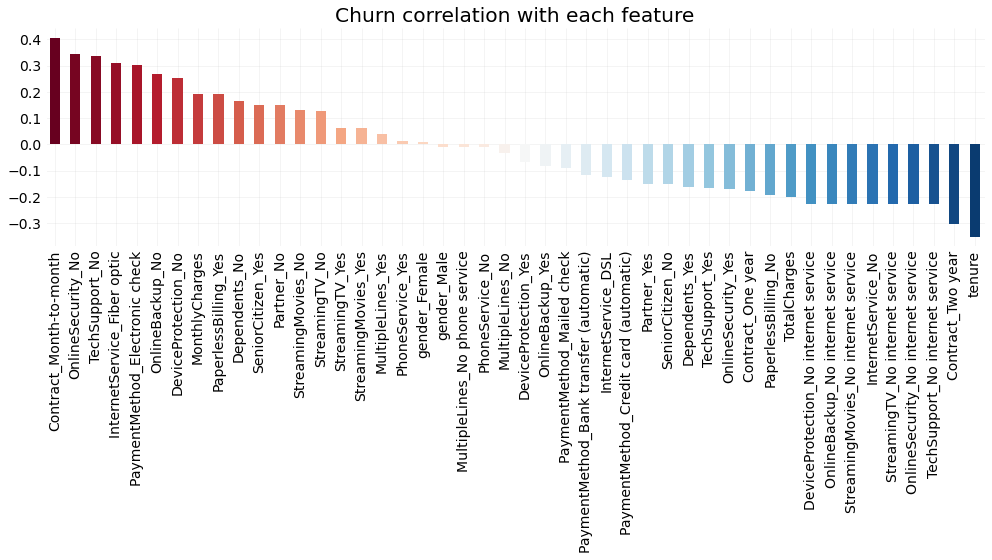

In [33]:
fig, ax = plt.subplots()
colormap = plt.get_cmap('RdBu')
churn_corr_dummies = df_dummies.corr()['Churn'].sort_values(ascending=False)
churn_corr_dummies[1:].plot(kind='bar',
                            color=colormap(np.linspace(0, 1,len(churn_corr_dummies))),
                            ax=ax)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.set_title('Churn correlation with each feature')
plt.show()

The correlation plot confirms the trends we have seen before:
- strong negative correlation with churn:
    - tenure
    - two years contract
    - no internet service
- strong positive correlation with churn:
    - month to month contract
    - no online services (security, tech support, backup, device protection)
    - fiber optic internet
    - electronic check payment

We could use these pieces of information to perform a feature selection [[11](https://scikit-learn.org/stable/modules/feature_selection.html)]. We are not going through this path here, but is something to explore in a future work. Feature selection can be used to reduce sample sets to improve scores or to boost performance on very high-dimensional datasets. The dataset in hand is not so large, then the feature selection path is left aside for a future study.

## Data transforms

![transforms](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/3.jpg?raw=true)

Before evaluating some machine learning algorithms, we need to do some data transforms as follows:
- the numerical features will be standardized to get the same range. This benefits some algorithms.
    - we are going to use `StandardScaler` from Scikit-Learn
- the categorical features will be encoded to be a suitable input to the algorithms
    - we are going to use `OneHotEncoder` from Scikit-Learn
- the target column will be encoded
    - we are going to use `LabelEncoder` from Scikit-Learn

In [34]:
std_scaler = StandardScaler()
label_encoder = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')

preprocessing = ColumnTransformer(transformers=[('std_scaler', std_scaler,
                                                 not_categorical[1:]),
                                                ('ohe', ohe, categorical[1:])])

df_clean = df.copy()

df_clean['Churn'] = label_encoder.fit_transform(df_clean['Churn'])

df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Splitting the dataset in two, features and target:

In [35]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [36]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## Evaluate algorithms

![algorithms_image](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/4.jpg?raw=true)

We need a reference to begin our model evaluation. A `DummyClassifier` instance will be used to create a frame of reference. Below, we configured this classifier so that it will always classify as the minority class, 1 ('Churn') in our case, a common configuration with imbalanced datasets.

In order to test the efficiency of a given classifier, we need to:
- split the data in a train and a test sets
    - the model will be evaluated with the test set (data that it has not dealt with before)
    - in an imbalanced dataset, the split should be stratified to maintain the same class distribution in each subset
    - the splits will be repeated with random samples
- perform a cross-validation to avoid overfitting

Since we are going to do these steps with our real models, they will be used with our reference too. The complete setup is:

In [37]:
dummy_model = DummyClassifier(strategy='constant', constant=1)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
                               random_state=RANDOM_STATE)

scores = cross_validate(dummy_model, X, y, scoring=scoring, cv=rskf,
                        n_jobs=JOBS)
score_table(scores)

    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.265    |   0.000   
Precision       |   0.265    |   0.000   
Recall          |   1.000    |   0.000   
F1 score        |   0.419    |   0.000   
F2 score        |   0.644    |   0.000   
AUROC           |   0.500    |   0.000   
AUPRC           |   0.265    |   0.000   


There are 7 metrics in the score table above. The accuracy value is exactly the proportion of churn in the dataset, since we adopted a constant strategy. The recall score is also consistent with the constant strategy. But which metric is more suitable to our case?

### Which metric to use?

Since we have an imbalanced dataset, accuracy might not be the best metric. This is known as the accuracy paradox [[9](https://en.wikipedia.org/wiki/Accuracy_paradox)]. In our dataset, if a model predicts every example as zero (no churn), it will have an accuracy of 73.5 %, which seems a high score but "predicts" only based on the majority class.

A common metric to compare models is the area under the ROC curve. However, as described in the literature [[10](https://dx.plos.org/10.1371/journal.pone.0118432)], it is also a metric that can be misleading with imbalanced data.

There are many approaches described in the literature. We don't have any information regarding costs (marketing costs, revenue lost due to churn) in this dataset, so we can't make a cost analysis. Then, remains the choice among metrics that deal with precision and recall like these metrics themselves, F-beta score and area under precision-recall curve (AUPRC). It will be considered that recall is more important than precision in this study, but we don't want low precision scores. This means that we are considering more important to predict real churn, minimizing false negatives, but we want to avoid increasing too much false positives. Considering these restrictions, we have F-beta score, with beta greater than one, and AUPRC. The values of all metrics will be shown but the chosen one is AUPRC.

The Scikit-Learn docs [[12](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)] state that the `average_precision_score` function from the package can be used as a AUPRC value, so it was the chosen function in this study.

Below, there are some models that will be tested. For the initial screening, there will be no modification of default parameters values, besides for those that have the option to set as a binary classifier. Those that have random behavior were seeded with a fixed value for reproducibility.

In [38]:
models = [('LR', LogisticRegression(max_iter=10000)),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=RANDOM_STATE)),
          ('NB', GaussianNB()),
          ('SVC', SVC(random_state=RANDOM_STATE)),
          ('RF', RandomForestClassifier(random_state=RANDOM_STATE)),
          ('SGD', SGDClassifier(random_state=RANDOM_STATE, loss='modified_huber')),
          ('LGBM', LGBMClassifier(random_state=RANDOM_STATE,
                                 objective='binary')),
          ('XGB', XGBClassifier(tree_method='hist',
                                objective='binary:logistic'))]

In [39]:
steps_before_model = [('preprocessing', preprocessing)]

model_summary(X, y, models, steps_before_model, jobs=JOBS);

LR
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.804    |   0.010   
Precision       |   0.657    |   0.022   
Recall          |   0.552    |   0.027   
F1 score        |   0.599    |   0.022   
F2 score        |   0.570    |   0.025   
AUROC           |   0.724    |   0.014   
AUPRC           |   0.482    |   0.020   

LDA
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.798    |   0.009   
Precision       |   0.637    |   0.019   
Recall          |   0.555    |   0.026   
F1 score        |   0.593    |   0.020   
F2 score        |   0.570    |   0.023   
AUROC           |   0.720    |   0.013   
AUPRC           |   0.472    |   0.017   

KNN
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.763    |   0.009   
Precision       |   0.558    |   0.017   
Recall          |   0.525    |   0.025   
F1 score        |   0.54

In [40]:
cm_means_norm_models = confusion_matrix_norm(X, y, models, steps_before_model)

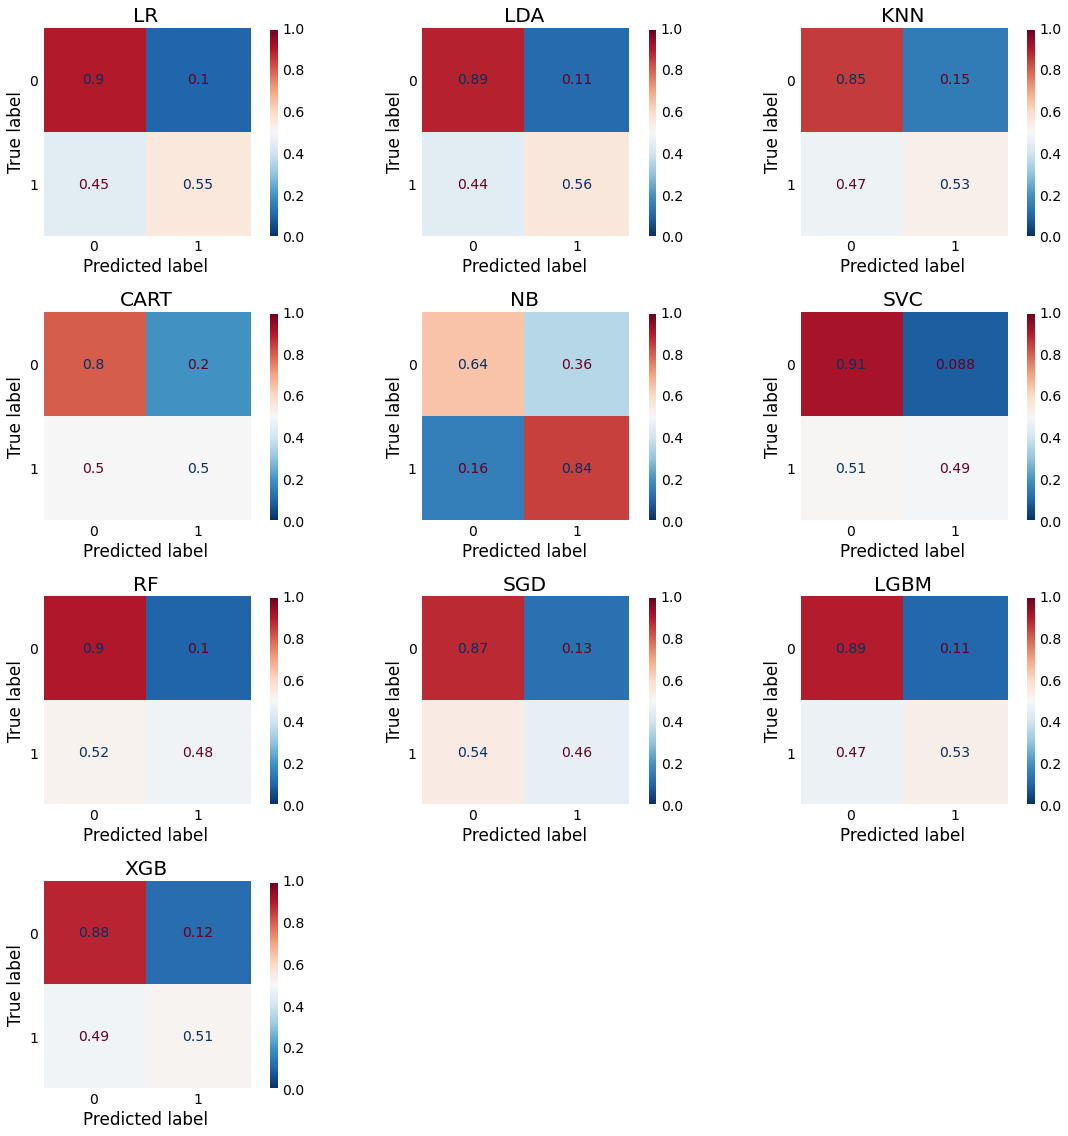

In [41]:
confusion_matrix_plot(models, cm_means_norm_models, nrows=4, ncols=3,
                      figsize=(16, 16), remove_empty_axes=2)

All models performed better than our dummy model reference considering our AUPRC metric. However, the values are still low. There is probably room for improvement. Many machine learning algorithms are prone to underperform with imbalanced datasets. We can also tune each model hyperparameter.

Regarding imbalance, there are many strategies to deal with this problem:

- Data sampling
    - Undersampling: delete or select a subset of examples from the majority class
    - Oversampling: duplicate examples in the minority class or synthesize new examples from the ones in the minority class
- Select an algorithm which is less affected, or not at all, to imbalance
- Collect more data, if possible
- Select a model that penalizes classification errors in minority class
- Select a metric that has more focus on the minority class

Since we have a static dataset, we can't collect more data. However, we can try all the other strategies. We have already discussed the metric that will be used. In the next sections, sampling strategies will be evaluated to deal with the imbalance problem, and a grid search for hyperparameters tuning will be performed in selected models.

### Undersampling

Our first strategy is using `RandomUnderSampler` from the Imbalanced Learn library. This sampler applies a random undersampling technique, which randomly delete examples in the majority class. The sampler will be added to the pipeline of steps to be applied after the preprocessing and before the model. Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The sampling is not applied to the test or holdout datasets used to evaluate the performance of a model.

In [42]:
steps_before_model_rus = [('preprocessing', preprocessing),
                          ('under', RandomUnderSampler(random_state=RANDOM_STATE))]

model_summary(X, y, models, steps_before_model_rus, jobs=JOBS);

LR
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.745    |   0.006   
Precision       |   0.512    |   0.008   
Recall          |   0.804    |   0.020   
F1 score        |   0.625    |   0.010   
F2 score        |   0.721    |   0.014   
AUROC           |   0.763    |   0.009   
AUPRC           |   0.464    |   0.009   

LDA
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.741    |   0.007   
Precision       |   0.508    |   0.009   
Recall          |   0.805    |   0.021   
F1 score        |   0.622    |   0.010   
F2 score        |   0.720    |   0.015   
AUROC           |   0.761    |   0.009   
AUPRC           |   0.460    |   0.010   

KNN
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.704    |   0.008   
Precision       |   0.466    |   0.008   
Recall          |   0.794    |   0.019   
F1 score        |   0.58

In [43]:
cm_means_norm_rus = confusion_matrix_norm(X, y, models, steps_before_model_rus)

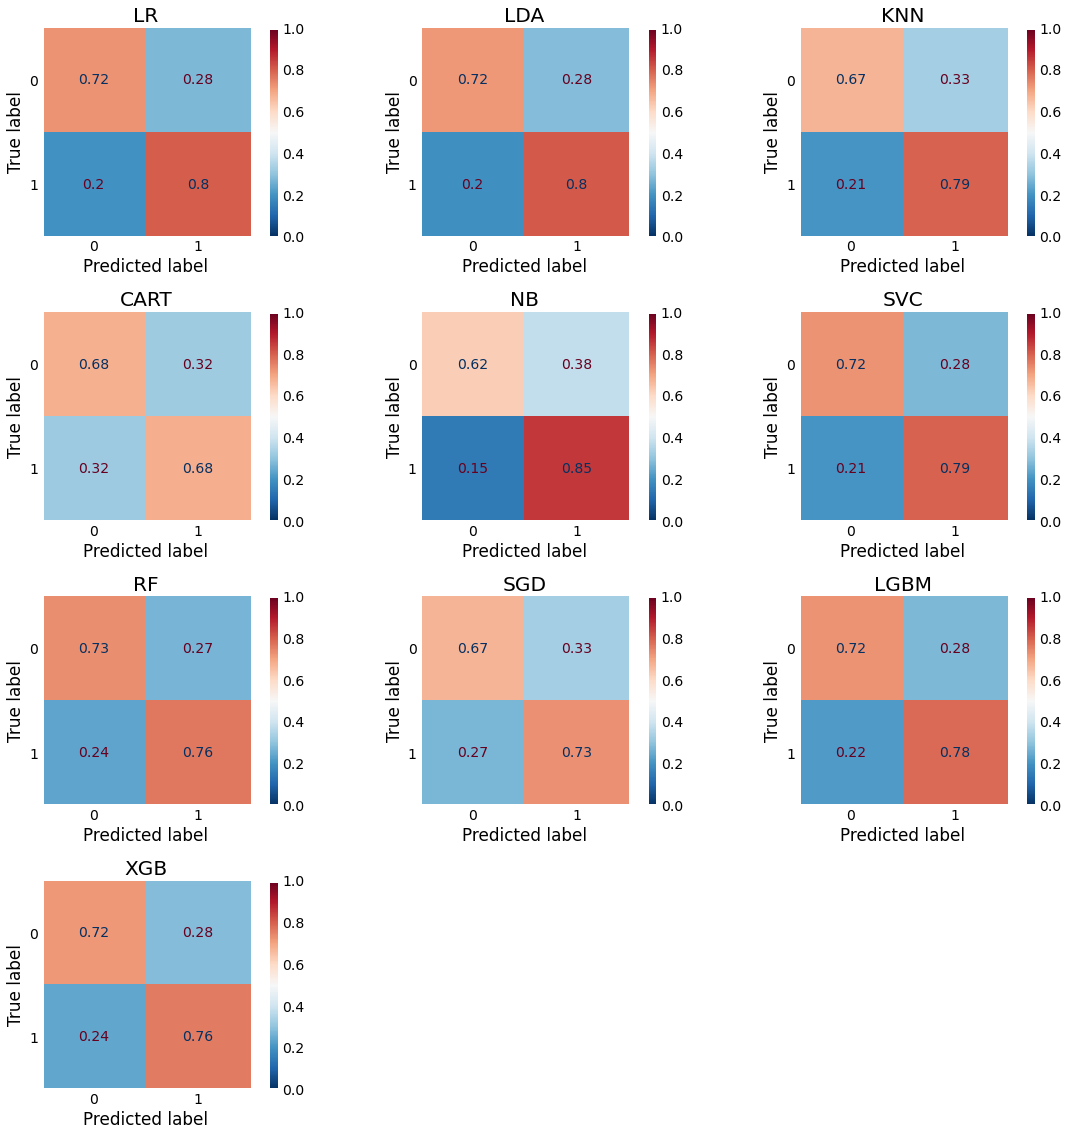

In [44]:
confusion_matrix_plot(models, cm_means_norm_rus, nrows=4, ncols=3,
                      figsize=(16, 16), remove_empty_axes=2)

As can be seen, recall values increased in all models, with decrease in precision values, since there is a trade-off between these metrics. Our models become better classifying the minority class with less false negatives but more false positives.

We have chosen the metric AUPRC. We are going to select 4 models with higher AUPRC to tune the hyperparameters: LR, LDA, SVC, LGBM.

#### Tuning hyperparameters - random undersampling

A grid search will be performed to find the best combination of hyperparameters for each model. In the cell below, we can see the possible values that will be evaluated for each hyperparameter. For those interested, commented code is provided for each unselected model so that one can evaluate all the models, even those that performed badly in the previous section.

In [45]:
models_params = []

models_params.append(('LR_l1',
                      LogisticRegression(max_iter=10000),
                      {'C': [0.01, 0.1, 1, 10],
                      'class_weight': [None, 'balanced'],
                      'penalty': ['l1'],
                      'solver': ['liblinear', 'saga']}))

models_params.append(('LR_l2',
                      LogisticRegression(max_iter=10000),
                      {'C': [0.01, 0.1, 1, 10],
                       'class_weight': [None, 'balanced'],
                       'penalty': ['l2'],
                       'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                  'saga']}))

models_params.append(('LDA',
                      LinearDiscriminantAnalysis(),
                      {'solver': ['svd', 'lsqr', 'eigen'],
                       'shrinkage': np.arange(0, 1, 0.01), }))

# models_params.append(('KNN',
#                       KNeighborsClassifier(),
#                       {'n_neighbors': list(range(2, 16, 1)),
#                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                        'weights': ['uniform', 'distance']}))
#
# models_params.append(('CART',
#                       DecisionTreeClassifier(random_state=RANDOM_STATE),
#                       {'max_depth': [2, 3, 5, 10],
#                        # 'min_samples_leaf': [5, 10, 20, 50, 100],
#                        'criterion': ['gini', 'entropy']}))
#
# models_params.append(('NB',
#                       GaussianNB(),
#                       {'var_smoothing': np.logspace(0, -9, num=100), }))

models_params.append(('SVC',
                      SVC(random_state=RANDOM_STATE),
                      {'C': [0.5, 0.75, 1],
                       'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                       'class_weight': [None, 'balanced'], }))

# models_params.append(('RF',
#                       RandomForestClassifier(random_state=RANDOM_STATE),
#                       {'max_depth': [2, 3, 5, 10, 20],
#                        # 'min_samples_split': [2, 5, 10],
#                        # 'min_samples_leaf': [5, 10, 20, 50, 100],
#                        'criterion': ['gini', 'entropy', 'log_loss'],
#                        'max_features': ['sqrt', 'log2', None],
#                        'bootstrap': [True, False],
#                        'n_estimators': [100, 250, 500, 1000]}))

# models_params.append(('SGD',
#                       SGDClassifier(random_state=RANDOM_STATE,
#                                     early_stopping=True,
#                                     validation_fraction=0.2),
#                       {'alpha': [1E-4, 1E-3, 1E-2, 1E-1, 1E0],
#                        'eta0': [0.01],
#                        'loss': ['hinge', 'log_loss', 'modified_huber',
#                                 'squared_hinge', 'perceptron'],
#                        'penalty': ['l2', 'l1', 'elasticnet'],
#                        'learning_rate': ['constant', 'optimal', 'invscaling',
#                                          'adaptive']}))

models_params.append(('LGBM',
                      LGBMClassifier(random_state=RANDOM_STATE,
                                     objective='binary',
                                     subsample=0.5, subsample_freq=5,
                                     colsample_bytree=0.7,
                                     ),
                      {'max_depth': range(1, 6, 1),
                       'num_iterations': [10, 50, 100, 500],
                       'learning_rate': [0.01, 0.1, 0.3],
                       'min_child_samples': [500, 1000],
                       # 'min_gain_to_split': [1, 5, 10],
                       # 'boosting_type': ['gbdt', 'dart', 'goss', 'rf']
                       }))

# models_params.append(('XGB',
#                       XGBClassifier(tree_method='hist',
#                                     objective='binary:logistic'),
#                       {'learning_rate': [0.01, 0.1, 0.3],
#                        'max_depth': range(1, 6, 1),
#                        'n_estimators': [10, 50, 100, 500],
#                        # 'subsample': [0.5, 0.75, 1.0],
#                        # 'colsample_bytree': [0.5, 0.75, 1.0]
#                        }))


In [46]:
results_rus = hyperparameter_tuning(X, y, models_params, steps_before_model_rus,
                                    scoring='average_precision', verb=0,
                                    jobs=JOBS)


Beginning for model LR_l1...

Beginning for model LR_l2...

Beginning for model LDA...

Beginning for model SVC...

Beginning for model LGBM...
End


In [47]:
results_rus

[Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('std_scaler',
                                                   StandardScaler(),
                                                   ('tenure', 'MonthlyCharges',
                                                    'TotalCharges')),
                                                  ('ohe',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Contract', 'Dependents',
                                                    'DeviceProtection',
                                                    'InternetService',
                                                    'MultipleLines',
                                                    'OnlineBackup',
                                                    'OnlineSecurity',
                                                    'PaperlessBilling',
                                

In [48]:
models_tuning_rus = [r[2] for r in results_rus]
models_tuning_rus

[LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga'),
 LogisticRegression(C=10, max_iter=10000),
 LinearDiscriminantAnalysis(shrinkage=0.48, solver='lsqr'),
 SVC(C=0.75, kernel='linear', random_state=42),
 LGBMClassifier(colsample_bytree=0.7, max_depth=1, min_child_samples=500,
                num_iterations=100, objective='binary', random_state=42,
                subsample=0.5, subsample_freq=5)]

In [49]:
names = [n for n, _, _ in models_params]
names

['LR_l1', 'LR_l2', 'LDA', 'SVC', 'LGBM']

In [50]:
models_tuning_rus = list(zip(names, models_tuning_rus))
models_tuning_rus

[('LR_l1',
  LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')),
 ('LR_l2', LogisticRegression(C=10, max_iter=10000)),
 ('LDA', LinearDiscriminantAnalysis(shrinkage=0.48, solver='lsqr')),
 ('SVC', SVC(C=0.75, kernel='linear', random_state=42)),
 ('LGBM',
  LGBMClassifier(colsample_bytree=0.7, max_depth=1, min_child_samples=500,
                 num_iterations=100, objective='binary', random_state=42,
                 subsample=0.5, subsample_freq=5))]

In [51]:
model_summary(X, y, models_tuning_rus, steps_before_model_rus, jobs=JOBS);

LR_l1
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.744    |   0.005   
Precision       |   0.511    |   0.006   
Recall          |   0.805    |   0.020   
F1 score        |   0.625    |   0.009   
F2 score        |   0.722    |   0.014   
AUROC           |   0.763    |   0.008   
AUPRC           |   0.463    |   0.008   

LR_l2
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.743    |   0.005   
Precision       |   0.511    |   0.006   
Recall          |   0.805    |   0.019   
F1 score        |   0.625    |   0.008   
F2 score        |   0.721    |   0.013   
AUROC           |   0.763    |   0.008   
AUPRC           |   0.463    |   0.008   

LDA
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.742    |   0.010   
Precision       |   0.509    |   0.012   
Recall          |   0.794    |   0.023   
F1 score        |  

In [52]:
cm_means_norm_rus_tuning = confusion_matrix_norm(X, y, models_tuning_rus,
                                                 steps_before_model_rus)

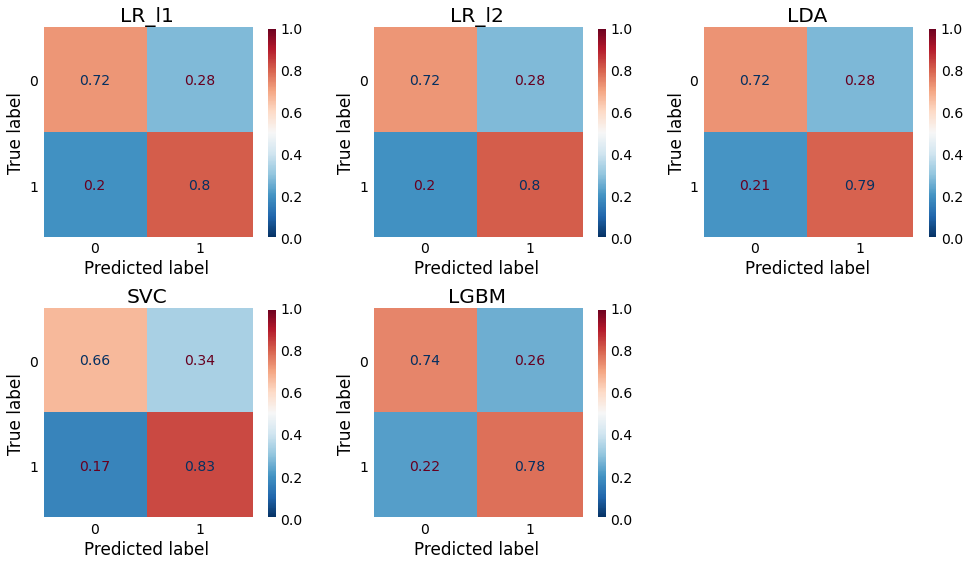

In [53]:
confusion_matrix_plot(models_tuning_rus, cm_means_norm_rus_tuning,
                      nrows=2, ncols=3,
                      figsize=(14, 8), remove_empty_axes=1)

As can be seen, LGBM performed slightly better than LR considering the AUPRC metric. Given that LR is usually easier to explain to all stakeholders and faster to implement, maybe is the best option for production. The LR algorithm gives a slightly higher recall (and slightly lower precision). Here, we will stay with LGBM.

Let's take a look at the 10 most important features according to the tuned LGBM classifier:

In [54]:
lgbm_tuning_rus = models_tuning_rus[-1][-1]
lgbm_tuning_rus

LGBMClassifier(colsample_bytree=0.7, max_depth=1, min_child_samples=500,
               num_iterations=100, objective='binary', random_state=42,
               subsample=0.5, subsample_freq=5)

In [55]:
lgbm_tuning_rus_importances = pd.DataFrame({'Feature': preprocessing.get_feature_names_out(),
                                           'Importance': lgbm_tuning_rus.feature_importances_})
lgbm_tuning_rus_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,std_scaler__tenure,25
12,ohe__InternetService_Fiber optic,9
29,ohe__PaymentMethod_Electronic check,8
1,std_scaler__MonthlyCharges,8
14,ohe__MultipleLines_No,8
2,std_scaler__TotalCharges,7
41,ohe__TechSupport_No,7
20,ohe__OnlineSecurity_No,7
3,ohe__Contract_Month-to-month,6
23,ohe__PaperlessBilling_No,5


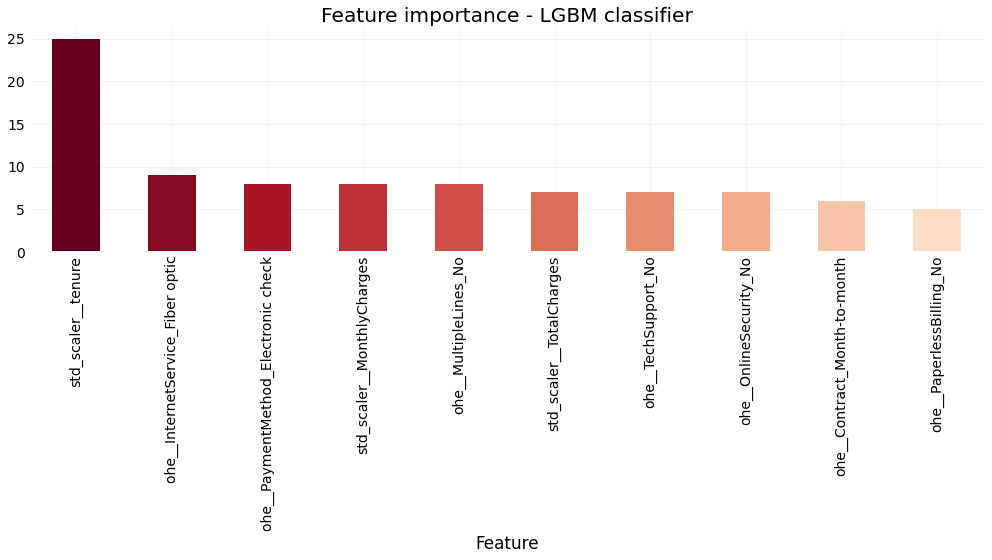

In [56]:
fig, ax = plt.subplots()
lgbm_tuning_rus_importances_top_10 = lgbm_tuning_rus_importances.sort_values(by='Importance',
                                                                           ascending=False)[:10]
lgbm_tuning_rus_importances_top_10.plot(kind='bar',
                                       color=colormap(np.linspace(0, 0.4, 10)),
                                       ax=ax, x='Feature', y='Importance',
                                       legend=False)
ax.set_title('Feature importance - LGBM classifier')
plt.show()


We see that all listed features are among the ones that we thoroughly discussed during the EDA performed in the summarizing section. It is interesting to notice that `tenure` is by far the most important feature. And, like detailed in the EDA, fiber optic internet is definitively a service the company should take a closer look at, being the second most important feature to our model.

Will oversampling be a better strategy?


### Oversampling

Now, we are going to use `SMOTE` from the Imbalanced Learn library. This sampler applies a Synthetic Minority Oversampling Technique (SMOTE), which select examples that are close in the feature space, drawing a line between the examples and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then *k* of the nearest neighbors for that example are found. A randomly selected neighbor is chosen, and a synthetic example is created at a randomly selected point between the two examples in feature space.

The sampler will be added to the pipeline of steps to be applied after the preprocessing and before the model. Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The sampling is not applied to the test or holdout datasets used to evaluate the performance of a model.

The same models from before will be tested. For the initial screening, there will be no modification of default parameters values, besides for those that have the option to set as a binary classifier.


In [57]:
models

[('LR', LogisticRegression(max_iter=10000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=42)),
 ('NB', GaussianNB()),
 ('SVC', SVC(random_state=42)),
 ('RF', RandomForestClassifier(random_state=42)),
 ('SGD', SGDClassifier(loss='modified_huber', random_state=42)),
 ('LGBM', LGBMClassifier(objective='binary', random_state=42)),
 ('XGB',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
     

In [58]:
steps_before_model_over = [('preprocessing', preprocessing),
                           ('over', SMOTE(random_state=RANDOM_STATE))]

model_summary(X, y, models, steps_before_model_over, jobs=JOBS);

LR
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.748    |   0.006   
Precision       |   0.517    |   0.008   
Recall          |   0.799    |   0.023   
F1 score        |   0.627    |   0.010   
F2 score        |   0.720    |   0.016   
AUROC           |   0.764    |   0.009   
AUPRC           |   0.466    |   0.009   

LDA
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.745    |   0.007   
Precision       |   0.513    |   0.008   
Recall          |   0.795    |   0.024   
F1 score        |   0.623    |   0.011   
F2 score        |   0.716    |   0.017   
AUROC           |   0.761    |   0.010   
AUPRC           |   0.462    |   0.010   

KNN
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.689    |   0.010   
Precision       |   0.447    |   0.011   
Recall          |   0.724    |   0.019   
F1 score        |   0.55

In [59]:
cm_means_norm_over = confusion_matrix_norm(X, y, models,
                                           steps_before_model_over)

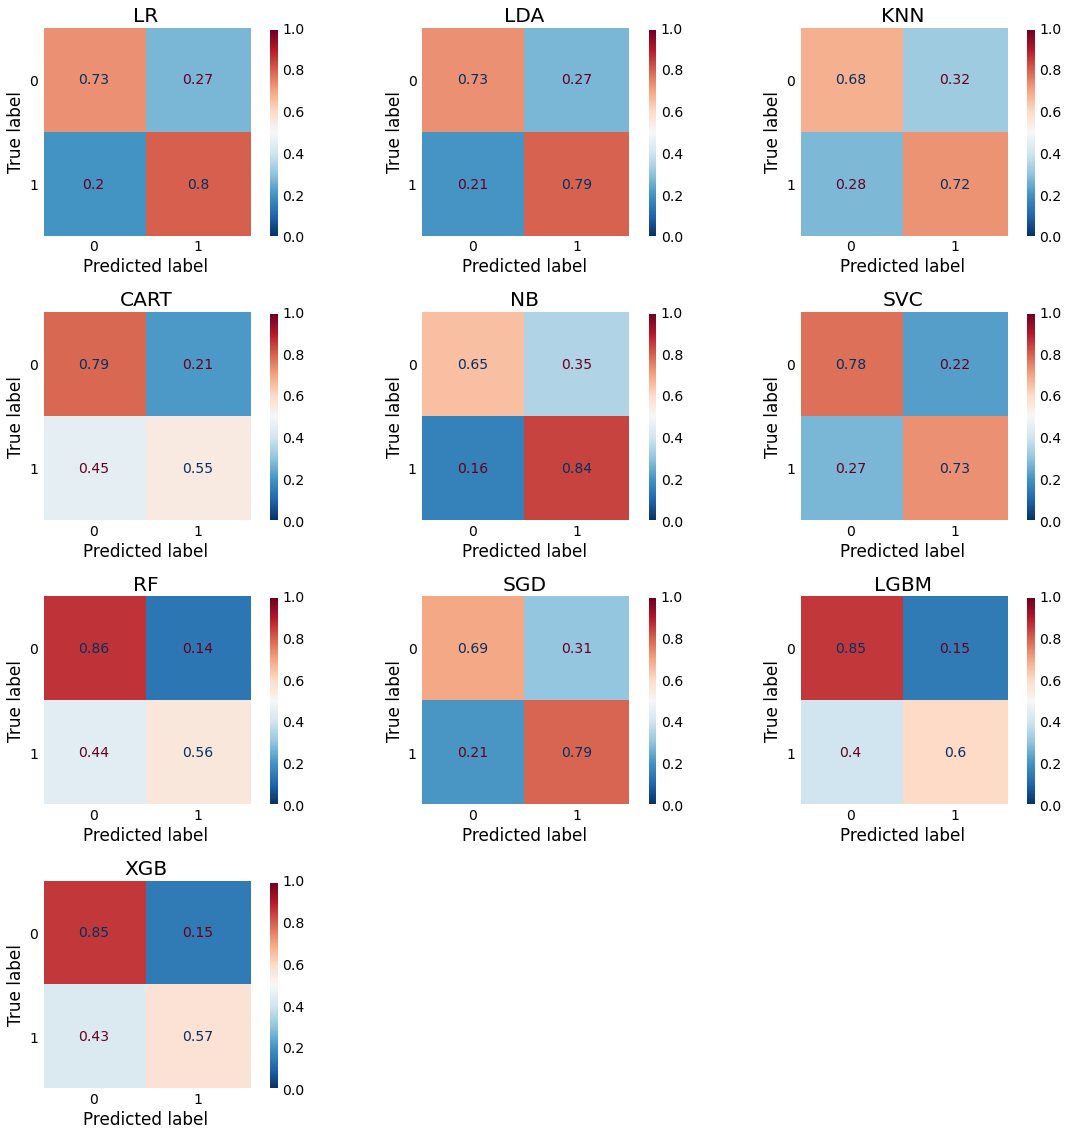

In [60]:
confusion_matrix_plot(models, cm_means_norm_over, nrows=4, ncols=3,
                      figsize=(16, 16), remove_empty_axes=2)

As can be seen, compared to no sampling, recall values increased in all models, with decrease in precision values since there is a trade-off between these metrics. Our models become better, classifying the minority class with less false negatives but more false positives.

We have chosen the metric AUPRC. We are going to select 4 models with higher AUPRC to tune the hyperparameters: LR, LDA, SVC, LGBM.

#### Tuning hyperparameters - oversampling

A grid search will be performed to find the best combination of hyperparameters for each model. The same hyperparameters evaluate for RUS will be evaluated here.


In [61]:
results_over = hyperparameter_tuning(X, y, models_params,
                                     steps_before_model_over,
                                     scoring='average_precision', verb=0,
                                     jobs=JOBS)


Beginning for model LR_l1...

Beginning for model LR_l2...

Beginning for model LDA...

Beginning for model SVC...

Beginning for model LGBM...
End


In [62]:
results_over

[Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('std_scaler',
                                                   StandardScaler(),
                                                   ('tenure', 'MonthlyCharges',
                                                    'TotalCharges')),
                                                  ('ohe',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   ['Contract', 'Dependents',
                                                    'DeviceProtection',
                                                    'InternetService',
                                                    'MultipleLines',
                                                    'OnlineBackup',
                                                    'OnlineSecurity',
                                                    'PaperlessBilling',
                                

In [63]:
models_tuning_over = [r[2] for r in results_over]
models_tuning_over

[LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear'),
 LogisticRegression(C=1, class_weight='balanced', max_iter=10000, solver='saga'),
 LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr'),
 SVC(C=0.5, kernel='linear', random_state=42),
 LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=1,
                min_child_samples=500, num_iterations=500, objective='binary',
                random_state=42, subsample=0.5, subsample_freq=5)]

In [64]:
models_tuning_over = list(zip(names, models_tuning_over))
models_tuning_over

[('LR_l1',
  LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')),
 ('LR_l2',
  LogisticRegression(C=1, class_weight='balanced', max_iter=10000, solver='saga')),
 ('LDA', LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')),
 ('SVC', SVC(C=0.5, kernel='linear', random_state=42)),
 ('LGBM',
  LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=1,
                 min_child_samples=500, num_iterations=500, objective='binary',
                 random_state=42, subsample=0.5, subsample_freq=5))]

In [65]:
model_summary(X, y, models_tuning_over, steps_before_model_over, jobs=JOBS);

LR_l1
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.751    |   0.008   
Precision       |   0.520    |   0.010   
Recall          |   0.798    |   0.022   
F1 score        |   0.629    |   0.011   
F2 score        |   0.720    |   0.016   
AUROC           |   0.766    |   0.010   
AUPRC           |   0.468    |   0.011   

LR_l2
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.748    |   0.006   
Precision       |   0.517    |   0.008   
Recall          |   0.799    |   0.023   
F1 score        |   0.627    |   0.010   
F2 score        |   0.720    |   0.016   
AUROC           |   0.764    |   0.009   
AUPRC           |   0.466    |   0.009   

LDA
    Metric      |    Mean    |  Std Dev  
----------------------------------------
Accuracy        |   0.747    |   0.009   
Precision       |   0.515    |   0.011   
Recall          |   0.787    |   0.023   
F1 score        |  

In [66]:
cm_means_norm_over_tuning = confusion_matrix_norm(X, y, models_tuning_over,
                                                  steps_before_model_over)

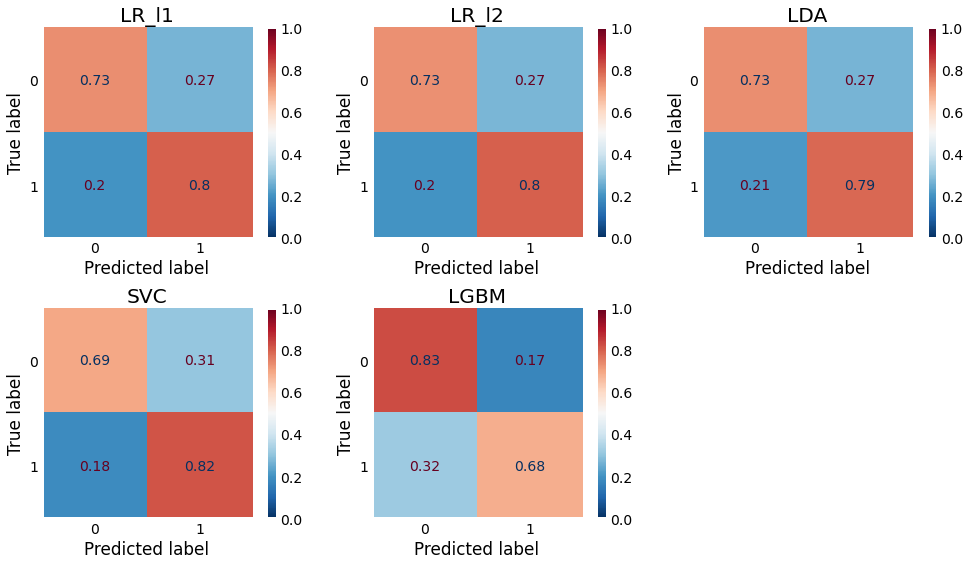

In [67]:
confusion_matrix_plot(models_tuning_over, cm_means_norm_over_tuning,
                      nrows=2, ncols=3, figsize=(14, 8), remove_empty_axes=1)


LGBM performed better considering the AUPRC metric. However, this result was due to a great precision score and a fair recall score. If more weight in recall is needed, logistic regression, the close second by the metric, seems a better choice, with the bonus of being a faster and easier to comprehend algorithm. As discussed earlier, we do not have costs data to support a choice between more weight to precision or recall. That's why we chose AUPRC as the metric, to have some balance between both.

The oversampling strategy did not improve the metrics compared with undersampling. Since it takes longer, and the SMOTE algorithm is more complex to explain to stakeholders, it is reasonable to choose undersampling, with the LGBM or the LR model, for production.

So, undersampling is better. Just for the sake of completeness, and since the LR algorithm is simpler and faster, let's take a look at the most important features according to this model combined with oversampling. We will choose the model with the `saga` solver, since both LR models shown before performed almost equally by the metric. This solver is a variation of gradient descent and incremental aggregated gradient approaches that uses a random sample of previous gradient values. Since it is fast for big datasets, and oversampling results in larger datasets compared with undersampling, it seems a reasonable choice.

In [68]:
lr_tuning_over = models_tuning_over[1][-1]
lr_tuning_over

LogisticRegression(C=1, class_weight='balanced', max_iter=10000, solver='saga')

The way to get information about feature importance in logistic regression is different from the one we saw for LGBM in the undersampling section. In order to understand, we need to remember some math.

Representing as $p_+(x)$ the model's estimate of the probability of class membership of a data item represented by feature vector **x**, we have the following equation that specifies that the log-odds of the class is equal to a linear function $f(x)$:

$$
\log \left( \frac{p_+(x)}{1 - p_+(x)} \right) = f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots
$$

where $w_i$ are the coefficients, or weights, of each feature. Solving the equation for $p_+(x)$, it yields the logistic function [[13](https://amzn.to/3OgzzTJ)]:

$$
p_+(x) = \frac{1}{1+\exp(-f(x))}
$$

This is a classification problem with classes 0 (no churn) and 1 (churn). The logistic regression model has a `coef_` property that contains the coefficients found for each feature. These coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0. We can order these values ascending and see the first 5 features (negative ones, predict 0), and the last 5 (positive, predict 1):

In [69]:
lr_tuning_over_importances = pd.DataFrame({'Feature': preprocessing.get_feature_names_out(),
                                           'Importance': lr_tuning_over.coef_[0]})
lr_tuning_over_importances.sort_values(by='Importance').head()

,Feature,Importance
0,std_scaler__tenure,-1.545057
5,ohe__Contract_Two year,-0.889923
1,std_scaler__MonthlyCharges,-0.444953
11,ohe__InternetService_DSL,-0.432502
14,ohe__MultipleLines_No,-0.252727


In [70]:
lr_tuning_over_importances.sort_values(by='Importance').tail()

,Feature,Importance
41,ohe__TechSupport_No,0.295541
29,ohe__PaymentMethod_Electronic check,0.379205
12,ohe__InternetService_Fiber optic,0.544658
3,ohe__Contract_Month-to-month,0.782041
2,std_scaler__TotalCharges,0.896876


The features listed are essentially the same that the LGBM model listed as the top 10 most important features in the undersampling section. We can see that `tenure` has the larger absolute value, being the feature with most weight.

We have seen that, mathematically, there is a relationship between these coefficients and odds. Actually, we can "convert" these coefficients to odds in order to make more sense of them by simply exponentiating the values [[14](https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1)]:

In [71]:
coeff_to_odds = np.exp(lr_tuning_over.coef_[0])
odds = pd.DataFrame({'Feature': preprocessing.get_feature_names_out(),
                     'odds': coeff_to_odds}).sort_values(by='odds',
                                                         ascending=False)
odds

,Feature,odds
2,std_scaler__TotalCharges,2.451932
3,ohe__Contract_Month-to-month,2.185929
12,ohe__InternetService_Fiber optic,1.724018
29,ohe__PaymentMethod_Electronic check,1.461123
41,ohe__TechSupport_No,1.343853
20,ohe__OnlineSecurity_No,1.287837
40,ohe__StreamingTV_Yes,1.270943
37,ohe__StreamingMovies_Yes,1.260364
24,ohe__PaperlessBilling_Yes,1.210565
16,ohe__MultipleLines_Yes,1.172015


Verbally, we can say that, for every one-unit increase in `TotalCharges`, the odds that the observation is in class 1 (churn) are 2.45 times as large as the odds that the observation is not in class 1 when all other variables are held constant. The same meaning stands for every value greater than 1. The top 5 are: `TotalCharges`, `Contract_Month-to-month`, `InternetService_Fiber optic`, `PaymentMethod_Electronic check` and `TechSupport_No`. It is interesting to see `TotalCharges` here, we have seen in the visualization section of this study that there are outliers in the churn class for this feature. Since the Scikit-Learn standard scaler, used in the preprocessing, is sensitive to outliers [[15](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#)], it might have some influence in this result. All the other features were discussed before as features that indicate churn.

For odds less than 1, we can take *1/odds* to make even better sense of them. So, for every one-unit increase in `tenure`, the odds that the observation is NOT in class 1 (churn) are 1/0.21 or 4.76 times as likely as the odds that it is in target class 1. The top 5, considering the inverse value, are: `tenure`, `Contract_Two year`, `MonthlyCharges`, `InternetService_DSL` and `MultipleLines_No`. All of these features were discussed in the EDA as features that do not indicate churn.

We can visualize the odds through a colorized bar chart as follows:

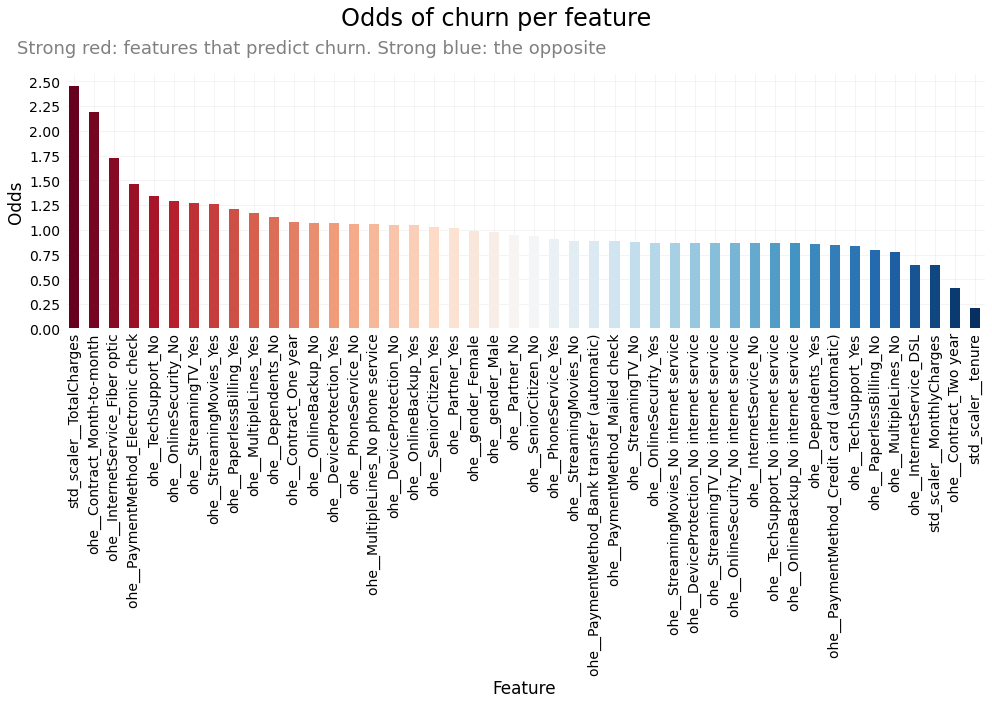

In [72]:
fig, ax = plt.subplots(figsize=(14, 10))
odds.plot(kind='bar', color=colormap(np.linspace(0, 1, len(odds))), ax=ax,
          x='Feature', y='odds', legend=False)
ax.set_ylabel('Odds')
ax.yaxis.set_major_locator(MultipleLocator(0.25))
fig.suptitle('Odds of churn per feature\n')
plt.gcf().text(0.025, 0.915,
               'Strong red: features that predict churn. Strong blue: the opposite',
               fontsize=18, color='gray')
plt.show()


## Conclusions and action plan

![conclusion_image](https://github.com/Ciencia-Programada/articles-images/blob/master/churn/5.jpg?raw=true)

Customer churn is a critical issue that needs to be analyzed and predicted. Therefore, a model that can predict customer churn and deal with a huge amount of data is significant. In this study:

- an extensive EDA was performed
    - detailed insights were gained from the data regarding important features
- pipelines were used with the following pattern: preprocessing (scaling, encoding); resampling; model
    - the pipelines were then input to cross validation with repeated stratified K-fold (5 fold, 3 repeats)
- resampling strategies were analyzed and compared
    - random undersampling and SMOTE had similar results
    - random undersampling is easier to explain to stakeholders and outputs a smaller dataset, resulting in faster train times when models are applied
        - it might be preferable in a production scenario
- AUPRC was the main metric to compare models due to its literature background in imbalanced datasets
    - the top 4 classifiers were chosen to hyperparameter tuning
- LGBM classifier had the best scores when applied after both resampling strategies
    - LR had close scores to LGBM
        - since it is an easier to explain and faster to train model, it might be preferable in a production scenario
        - if it is desired higher recall values, LR is the best model
- both LGBM and LR important features were among the ones detailed in the EDA

**The results suggest that the Telco company should:**

- give more attention to technical support
- improve the fiber optic service
- invest in marketing strategies targeting
    - customers with short-term contracts, trying to move them to long contracts
    - customers without online services, offering these services
    - single customers, since their churn rate is higher than that of those who have partners and dependents
- guide customers towards simple paying methods like paper billing and credit card

The results shown here give some background and ideas for future works exploring:

- feature selection
- `class_weight` in models that support it or some similar parameter
- a scaler, apart from StandardScaler, less sensitive to outliers
- combination of random undersampling and oversampling
- tuning more hyperparameters for the selected models
- other models, like the ones used in the cited papers

Anyway, I hope to have provided interesting insights, and a valuable project. Should you have any comments, questions or suggestions, don't hesitate to contact me:

<a href="https://www.linkedin.com/in/flsbustamante" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a> 
<br>
<a href="https://franciscobustamante.com.br" target="_blank"><img src="https://img.shields.io/badge/portfolio-000000?style=for-the-badge&logo=About.me&logoColor=white" target="_blank"></a>
<br>
[<center><img alt="GitHub" width="10%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/chicolucio)

## References

1. N. Modani, K. Dey, R. Gupta, and S. Godbole, “CDR Analysis Based Telco Churn Prediction and Customer Behavior Insights: A Case Study,” in Web Information Systems Engineering – WISE 2013, vol. 8181, X. Lin, Y. Manolopoulos, D. Srivastava, and G. Huang, Eds. Berlin, Heidelberg: Springer Berlin Heidelberg, 2013, pp. 256–269. doi: 10.1007/978-3-642-41154-0_19.
2. S. Agrawal, A. Das, A. Gaikwad, and S. Dhage, “Customer Churn Prediction Modelling Based on Behavioural Patterns Analysis using Deep Learning,” in 2018 International Conference on Smart Computing and Electronic Enterprise (ICSCEE), Shah Alam, Jul. 2018, pp. 1–6. doi: 10.1109/ICSCEE.2018.8538420.
3. I. Ullah, B. Raza, A. K. Malik, M. Imran, S. U. Islam, and S. W. Kim, “A Churn Prediction Model Using Random Forest: Analysis of Machine Learning Techniques for Churn Prediction and Factor Identification in Telecom Sector,” IEEE Access, vol. 7, pp. 60134–60149, 2019, doi: 10.1109/ACCESS.2019.2914999.
4. “Churn.” https://www.productplan.com/glossary/churn/ (accessed Jun. 22, 2022).
5. IBM. "Telco customer churn". https://www.kaggle.com/datasets/blastchar/telco-customer-churn (accessed Jun. 1, 2022)
6. Shearer C., The CRISP-DM model: the new blueprint for data mining, J Data Warehousing (2000); 5:13—22
7. F. L. S. Bustamante, Customer churn prediction, 2022. https://github.com/chicolucio/customer-churn-prediction
8. J. Burez and D. Van den Poel, “Handling class imbalance in customer churn prediction,” Expert Systems with Applications, vol. 36, no. 3, pp. 4626–4636, Apr. 2009, doi: 10.1016/j.eswa.2008.05.027.
9. Wikipedia. "Accuracy paradox". https://en.wikipedia.org/wiki/Accuracy_paradox
10. T. Saito and M. Rehmsmeier, “The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets,” PLoS ONE, vol. 10, no. 3, p. e0118432, Mar. 2015, doi: 10.1371/journal.pone.0118432.
11. Scikit-Learn. "Feature selection". https://scikit-learn.org/stable/modules/feature_selection.html
12. Scikit-Learn. "Model evaluation". https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
13. Provost, Foster, and Tom Fawcett. Data Science for Business: what You Need to Know About Data Mining and Data-analytic Thinking. Sebastopol, Calif.: O'Reilly, 2013
14. J. Benton, “Interpreting Coefficients in Linear and Logistic Regression,” Medium, Jul. 22, 2020. https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1 (accessed Jun. 21, 2022).
15. Scikit-Learn. "Compare the effect of different scalers on data with outliers". https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#
